In [10]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
plt.gray()

<Figure size 432x288 with 0 Axes>

In [11]:
# Mini quiz
# 1 camera projection
R = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
cameraMat = np.array([[725, 0, 631], [0, 726, 360], [0, 0, 1]])
cameraCoor = np.array([1,1,4, 1]).T

Rmarked = np.concatenate((R, np.zeros((3,1))), axis=1)

point = cameraMat@Rmarked@cameraCoor
point /= point[2]
point

# 7
# Calculate the dissimilarity between two images, using sum of squared differences
A = np.array([[10, 15, 20], [20, 20, 25], [10, 15, 20]])
B = np.array([[15, 15, 15], [20, 20, 20], [30, 30, 30]])
sum = np.sum(np.square(A-B))
sum

800

In [12]:
# Weekly project
# import images from rs folder
# loop through images

img_left, img_right = [], []

for i in os.listdir("rs"):
    if "left" in i:
        img_left.append(cv2.imread("rs/" + i, 0))
    else:
        img_right.append(cv2.imread("rs/" + i, 0))

# undistort images
# first find camera matrix
# cameraMat = np.eye(3)
# cameraMat = cv2.getOptimalNewCameraMatrix(cameraMat, np.eye(3), (640, 480), 1, (640, 480))
# img_left = cv2.undistort(img_left[0], cameraMat, np.zeros((5,1)))

In [14]:
"""
Implement the number of vertical and horizontal corners
"""
nb_vertical = 9
nb_horizontal = 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# images = glob.glob('imgs/*.png')
# images = glob.glob('imgs/1403709042537837056.png')
# assert images


gray = img_left[20]
ret, corners = cv2.findChessboardCorners(gray, (nb_vertical, nb_horizontal), None)
objpoints.append(objp)
imgpoints.append(corners)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
h,  w = gray.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
dst = cv2.undistort(gray, mtx, dist, None, newcameramtx)

True


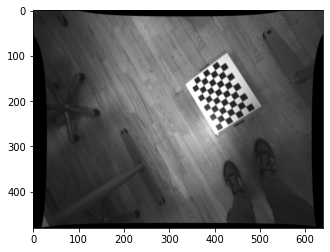

In [16]:
dist_left, dist_right = [], []
for left, right in zip(img_left, img_right):
    dist_left.append(cv2.undistort(left, mtx, dist, None, newcameramtx))
    dist_right.append(cv2.undistort(right, mtx, dist, None, newcameramtx))

In [17]:
# rectify the undistorted images
test = cv2.stereoRectify(mtx, dist, mtx, dist, gray.shape[::-1], R, newcameramtx, None, None, None, None, cv2.CALIB_ZERO_DISPARITY, 0)
test


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\calib3d\src\calibration.cpp:267: error: (-210:Unsupported format or combination of formats) The matrices must have 32f or 64f data type in function 'cvRodrigues2'
